# Daten-Visualisierung (Korpussammlung)

Das vorliegende Jupyter-Notebook dient dazu, Statistiken zu den Korpus-Annotationen zu visualisieren.
Dieses Notebook ermöglicht es, mehrere Subkorpora (in der Form mehrerer XMI-Dateien) zu einem großen Korpus zusammenzufassen. Einzelne Subkorpora können ebenfalls hiermit analysiert werden, ein bisschen einfacher ist es aber mit dem Notebook analysis_notebook_single.

## Setup

Setup. Muss ausgeführt werden, wenn das Notebook in Colab ausgeführt wird.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!git clone https://github.com/maria-becker/Moralization/
%cd "/content/Moralization/Annotation Analysis Tools/data_analysis"

Die import-Statements müssen immer ausgeführt werden.

In [1]:
import sys
import annotation_stats_single as astats
import label_analysis as la

sys.path.append("../_utils_")
import corpus_extraction as ce
import xmi_analysis_util as xau

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


Hier bitte eine Liste *file_list* erstellen, die die Dateipfade zu allen Korpusdateien enthält, die ihr analysieren wollt.
+ *Am einfachsten erhält man einen Dateipfad, indem man die Datei im Ordersystem rechtsklickt und dann -> 'Pfad kopieren' auswählt. Und unbedingt den Pfad in Anführungszeichen setzen und davor ein kleines "r"!*
+ *Wer sich ein bisschen auskennt, kann zum Erstellen der Liste auch das os-Modul benutzen, das aus diesem Grund oben importiert wurde.*

Bei der Erstellung des corpus-Objekts ist zu beachten, welche Sprache(n) in eurem Korpus vertreten sind. Ist es sowohl Deutsch als auch die Fremdsprachen, muss *"all"* angegeben werde, für nur Deutsch *"de"* und für andere Sprachkombinationen kann ein beliebiger anderer String übergeben werden (z.B. *"fremd"*).

In [2]:
# Create a list via the list_xmis_in_directory() function
directory_path = '/home/brunobrocai/Data/Moralization/Zeitungs_XMIs'

file_list = xau.list_xmis_in_directory(directory_path)
corpus = ce.Corpus(file_list, 'de')

In [3]:
# Filter unwanted labels
corpus.filter_out("protagonists", ["Kein Bezug"])
corpus.filter_out("protagonists_doubles", ["Kein Bezug"])

## Analyse 1: Frequenzen

Die folgende Funktion gibt an, **wie häufig es ist, dass ein Label n Mal in einer Moralisierung vergeben wird** (*Beispiel: Oft gibt es zwei Protagonisten in einer Moralisierung, aber nur selten sechs oder sieben.*).

+ Der erste Parameter ist das Korpus. Hier einfach *corpus* stehen lassen.
+ Der zweite Parameter - *label_type* - ist die Kategorie des Phänomens, von denen wir wissen wollen, wie oft sie in den Moralisierungen auftauchen. Verwendet werden können:
  + *obj_morals*: Alle Moralwerte, die keine subjektiven Ausdrücke sind
  + *subj_morals*: Moralwerte, die subjektive Ausdrücke sind
  + *all_morals*: Alle Moralwerte
  + *protagonists*: Alle Protagonisten-Token
  + *protagonists_doubles*: Alle Protagonisten-Rollen (Achtung: manche Protagonisten-Token werden dabei doppelt gezählt - nämlich, wenn sie mehrere Rollen haben)
  + *com_functions*: Kommunikative Funktionen
  + *expl_demands*: Explizite Forderungen
  + *impl_demands*: Implizite Forderungen
  + *all_demands*: Alle Forderungen
+ Der Parameter *plot* gibt an, ob die Daten als Tabelle (*False*) oder als Säulendiagramm (*True*) visualisiert werden sollen.
+ Der Parameter *export* (*True* oder *False*) gibt an, ob die Daten als csv-Datei im derzeitigen Verzeichnis abgelegt werden sollen.


[{'Coordinates': (1127, 1147), 'Category': 'Care'}, {'Coordinates': (2066, 2083), 'Category': 'Care'}, {'Coordinates': (3268, 3289), 'Category': 'Cheating'}, {'Coordinates': (3268, 3289), 'Category': 'Oppression'}, {'Coordinates': (5743, 5759), 'Category': 'Fairness'}, {'Coordinates': (5764, 5774), 'Category': 'Fairness'}, {'Coordinates': (6823, 6830), 'Category': 'Fairness'}, {'Coordinates': (6823, 6830), 'Category': 'Liberty'}, {'Coordinates': (6823, 6830), 'Category': 'Care'}, {'Coordinates': (6903, 6912), 'Category': 'Liberty'}, {'Coordinates': (6934, 6944), 'Category': 'Harm'}, {'Coordinates': (7056, 7066), 'Category': 'Fairness'}, {'Coordinates': (10416, 10423), 'Category': 'Care'}, {'Coordinates': (10416, 10423), 'Category': 'Liberty'}, {'Coordinates': (10416, 10423), 'Category': 'Fairness'}, {'Coordinates': (10428, 10437), 'Category': 'Care'}, {'Coordinates': (10443, 10494), 'Category': 'Fairness'}, {'Coordinates': (14097, 14110), 'Category': 'Fairness'}, {'Coordinates': (14985

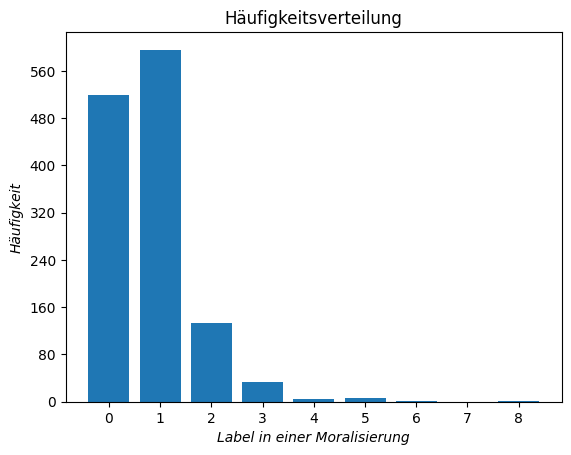

,Label in einer Moralis.,Häufigkeit,Anteil
0,0,519,0.400772
1,1,596,0.460232
2,2,133,0.102703
3,3,34,0.026255
4,4,5,0.003861
5,5,6,0.004633
6,6,1,0.000772
7,7,0,0.000000
8,8,1,0.000772
9,Summe,1295,1.000000


In [6]:
astats.freq_inside_spans(
    corpus,
    label_type="obj_morals",
    plot=True
)

---

Die folgende Funktionen wertet die **Häufigkeiten verschiedener Label einer Kategorie** aus. Es gibt folgende Funktionen:
1. *moral_values_freq()* - Moralwerte
   + Hier ist zu beachten, welche Moralwerte *("all", "obj" oder "subj." ausgewertet werden sollen). Es wird mit dem Parameter *moral_type* weitergegeben.
   + *sum_dimensions* gibt an, ob MFT-Dimensionspaare (z.B. Care-Harm) zusammen (*True*) oder getrennt (*False*) ausgegeben werden sollen.
2. *protagonist_role_freq()* - Protagonisten-Rollen
3. *protagonist_group_freq()* - Protagonisten-Typen/Gruppen (Individuum, Institution usw.)
4. *protagonist_ownother_freq()* - Protagonisten-Gruppenzuschreibungen
5. *comfunction_freq()* - Kommunikative Funktionen
6. *demand_freq()* - Forderungstypen

Alle Funktionen haben folgende Parameter:
+ Der erste Parameter ist das Korpus. Hier einfach *corpus* stehen lassen.
+ Der vorletzte Parameter *plot* gibt an, ob die Daten als Tabelle (*False*) oder als Säulendiagramm (*True*) visualisiert werden sollen.
+ Der letzte Parameter *export* (*True* oder *False*) gibt an, ob die Daten als csv-Datei im derzeitigen Verzeichnis abgelegt werden sollen.


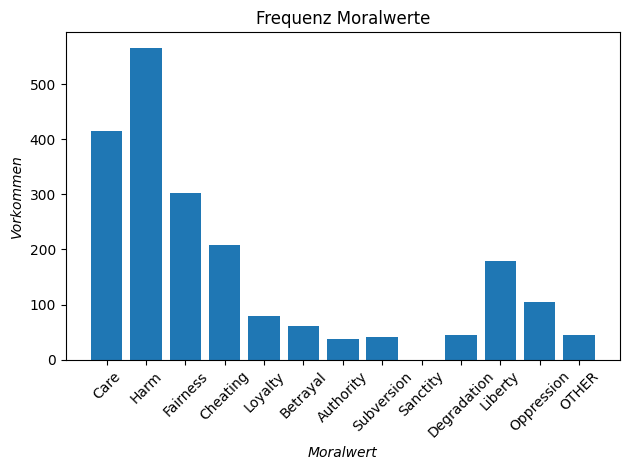

,Moralwert,Vorkommen,Anteil
0,Care,415,0.199136
1,Harm,566,0.271593
2,Fairness,303,0.145393
3,Cheating,208,0.099808
4,Loyalty,80,0.038388
5,Betrayal,61,0.029271
6,Authority,38,0.018234
7,Subversion,41,0.019674
8,Sanctity,0,0.000000
9,Degradation,44,0.021113


In [7]:
astats.label_frequency(
    corpus,
    label="all_morals",
    plot=True
)

## Analyse 1.5: Protagonisten-Zusammenhänge
Die Protagonisten-Kategorie ist interessant, weil für Protagonisten gleich mehrere Label vergeben werden. Mit folgenden Funktionen kann berechnet werden, wie diese zusammenhängen.

Drei Funktionen sind verfügbar:
1. *roles_and_groups()* - Zusammenhang zw. Rollen- und Gruppenlabel
2. *roles_and_ownother()* - Zusammenhang zw. Rollen- und Gruppenzugehörigkeitslabel
3. *groups_and_ownother()* - Zusammenhang zw. Gruppen- und Gruppenzugehörigkeitslabel

Alle Funktionen haben folgende Parameter:
+ Der erste Parameter ist das Korpus. Hier einfach *corpus* stehen lassen.
+ Der vorletzte Parameter *percent* gibt an, ob die Daten als Prozent der Spaltensumme (*True*) oder nicht (*False*) ausgegeben werden sollen.
+ Der letzte Parameter *export* (*True* oder *False*) gibt an, ob die Daten als csv-Datei im derzeitigen Verzeichnis abgelegt werden sollen.

In [ ]:
astats.roles_and_groups(
    corpus,
    export=False,
    language="de"
)

## Analyse 2: Label-Kookkurenzen
Mit folgender Funktion kann ermittelt werden, ob manche Label überzufällig häufig mit anderen Label auftauchen.

Die Funktion *association_measure* berechnet PMI (pointwise mutual information) für die Label-Okkurenzen innerhalb von moralisierenden Spans.

Die Funktion *association_measure* hat folgende Parameter:
+ Der erste Parameter ist das Korpus. Hier einfach *corpus* stehen lassen.
+ Der zweite und der dritte Parameter sind die Label, deren Kookurrenzen innerhalb von Moralisierungen untersucht werden sollen. Folgende Label stehen zur Verfügung:
    + obj_morals
    + subj_morals
    + all_morals
    + prot_roles
    + prot_groups
    + com_functions
    + demands
+ Der Parameter *significance* gibt an, ob zusätzlich zum PMI das statistische Signifikanzniveau der Verteilung (mittels Fischers Exaktem Text) berechnet werden soll.
+ Der letzte Parameter *export* (*True* oder *False*) gibt an, ob die Daten als csv-Datei im derzeitigen Verzeichnis abgelegt werden sollen.

In [ ]:
astats.association_measure(
    corpus,
    "prot_roles",
    "prot_groups",
    significance=True,
    export=False
)